In [41]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load  the Dataset
tit_df = pd.read_csv(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\titanic_data.csv")

In [17]:
# Reading the dataset
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [7]:
# Shape
tit_df.shape

(891, 12)

In [25]:
# Checking for null/missing values
tit_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [9]:
# Cleaning our Age section
tit_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
tit_df['Age'] = tit_df['Age'].fillna(method='ffill')

In [24]:
# Cleaning our Cabin section
tit_df['Cabin'].value_counts()

G6         24
B78        21
C78        20
C83        19
F33        19
           ..
C62 C64     1
D45         1
A5          1
C111        1
D47         1
Name: Cabin, Length: 147, dtype: int64

In [19]:
tit_df['Cabin'] = tit_df['Cabin'].fillna(method='ffill')

In [22]:
# Cleaning the embarked section
tit_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
tit_df['Embarked'] = tit_df['Embarked'].fillna(method='ffill')

In [31]:
# Dropping the columns we don't need
drop_list=['Cabin','Ticket','PassengerId']

tit_df = tit_df.drop(drop_list,axis=1)

In [35]:
# Saving our cleaned dataset to the cvs file
tit_df.to_csv(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\titanic_data.csv", index=False)
tit_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [36]:
# Check Columns
tit_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
# Descriptive Stats
tit_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [38]:
# Get the value count for Survived
tit_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

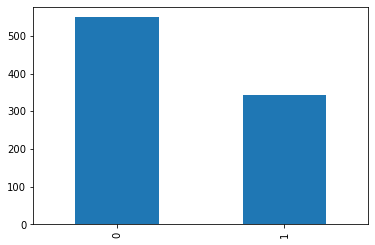

In [39]:
# Quick plot of the Survived Column
tit_df['Survived'].value_counts().plot(kind='bar')

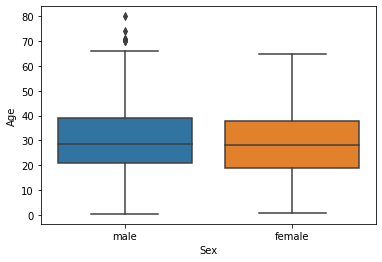

In [43]:
# Plotting the Age vs sex
sns.boxplot(x='Sex',y='Age',data=tit_df)

## Using Pycaret for Machine Learning Prediction

In [49]:
import pycaret.classification as pc

In [50]:
dir(pycaret.classification)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'create_stacknet',
 'deploy_model',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'interpret_model',
 'load_experiment',
 'load_model',
 'optimize_threshold',
 'plot_model',
 'predict_model',
 'save_experiment',
 'save_model',
 'setup',
 'stack_models',
 'tune_model']

In [52]:
clf = pc.setup(data = tit_df, target='Survived')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4246
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 9)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
# Compare models
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.8186,0.8751,0.6908,0.8136,0.7426,0.6048
1,Decision Tree Classifier,0.817,0.7955,0.7031,0.8015,0.7455,0.6042
2,Light Gradient Boosting Machine,0.817,0.8734,0.7236,0.7807,0.7502,0.6064
3,CatBoost Classifier,0.8169,0.8798,0.6864,0.8122,0.738,0.6002
4,Logistic Regression,0.8154,0.8642,0.7241,0.7825,0.7468,0.603
5,Extreme Gradient Boosting,0.8106,0.8831,0.6987,0.7858,0.737,0.5904
6,Extra Trees Classifier,0.8105,0.8641,0.6652,0.8078,0.7269,0.5847
7,Ridge Classifier,0.809,0,0.6949,0.7848,0.7311,0.5853
8,Ada Boost Classifier,0.8058,0.8627,0.6737,0.7936,0.7212,0.5756
9,Random Forest Classifier,0.7945,0.8381,0.6277,0.7955,0.6975,0.5463


## Creating the Models

In [55]:
import neatutils
neatutils.get_abbrev('Gradient Boosting Classifier')

'gbc'

In [56]:
# Creating the Gradient Boosting Classifier model
gbc_model = pc.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7778,0.8563,0.6250,0.7500,0.6818,0.5132
1,0.8254,0.8381,0.7083,0.8095,0.7556,0.6207
2,0.8730,0.9087,0.7500,0.9000,0.8182,0.7219
3,0.8710,0.8852,0.7826,0.8571,0.8182,0.7185
4,0.8065,0.8564,0.7500,0.7500,0.7500,0.5921
5,0.8548,0.9578,0.6250,1.0000,0.7692,0.6714
6,0.7419,0.7982,0.5000,0.7500,0.6000,0.4206
7,0.8226,0.8794,0.7500,0.7826,0.7660,0.6232
8,0.8548,0.9320,0.8333,0.8000,0.8163,0.6964
9,0.7581,0.8388,0.5833,0.7368,0.6512,0.4698


In [58]:
neatutils.get_abbrev('Logistic Regression')

'lr'

In [61]:
lr_model = pc.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8095,0.8536,0.7917,0.7308,0.7600,0.6025
1,0.7937,0.8248,0.6667,0.7619,0.7111,0.5517
2,0.8254,0.9113,0.7083,0.8095,0.7556,0.6207
3,0.8226,0.8718,0.7826,0.7500,0.7660,0.6232
4,0.8065,0.8311,0.7917,0.7308,0.7600,0.5983
5,0.8710,0.9298,0.7500,0.9000,0.8182,0.7195
6,0.7742,0.8300,0.5417,0.8125,0.6500,0.4930
7,0.8065,0.8684,0.7500,0.7500,0.7500,0.5921
8,0.8871,0.9315,0.9167,0.8148,0.8627,0.7674
9,0.7581,0.7895,0.5417,0.7647,0.6341,0.4612


In [62]:
# Tune the model (Getting the best)
tuned_gbc = pc.tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8611,0.7500,0.7826,0.7660,0.6268
1,0.8095,0.7970,0.6667,0.8000,0.7273,0.5828
2,0.7937,0.8750,0.6667,0.7619,0.7111,0.5517
3,0.7097,0.6355,0.3478,0.7273,0.4706,0.3034
4,0.7581,0.7884,0.6250,0.7143,0.6667,0.4781
5,0.8710,0.9583,0.7083,0.9444,0.8095,0.7149
6,0.7419,0.8136,0.5417,0.7222,0.6190,0.4299
7,0.8387,0.8459,0.7917,0.7917,0.7917,0.6601
8,0.8710,0.9030,0.8333,0.8333,0.8333,0.7281
9,0.7903,0.8048,0.5417,0.8667,0.6667,0.5253


In [63]:
print(gbc_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4246, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [64]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.8200000000000001, loss='deviance',
                           max_depth=40, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=145, n_iter_no_change=None,
                           presort='deprecated', random_state=4246,
                           subsample=0.8500000000000002, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [65]:
# Evaluate the model
pc.evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
pc.evaluate_model(lr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

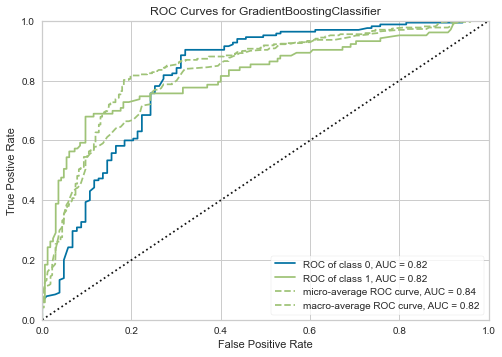

In [68]:
# Plot Performance of the model
pc.plot_model(tuned_gbc)

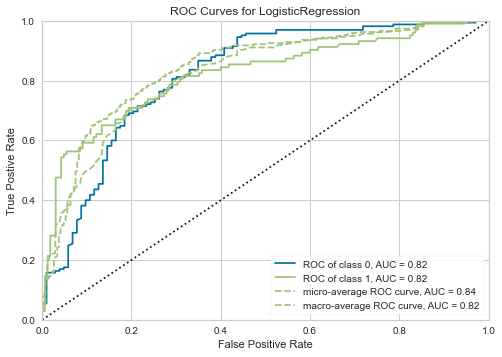

In [72]:
pc.plot_model(lr_model)

In [73]:
# Saving the models
pc.save_model(tuned_gbc,'gbc_save_model')
pc.save_model(lr_model,'lr_model_save_model')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


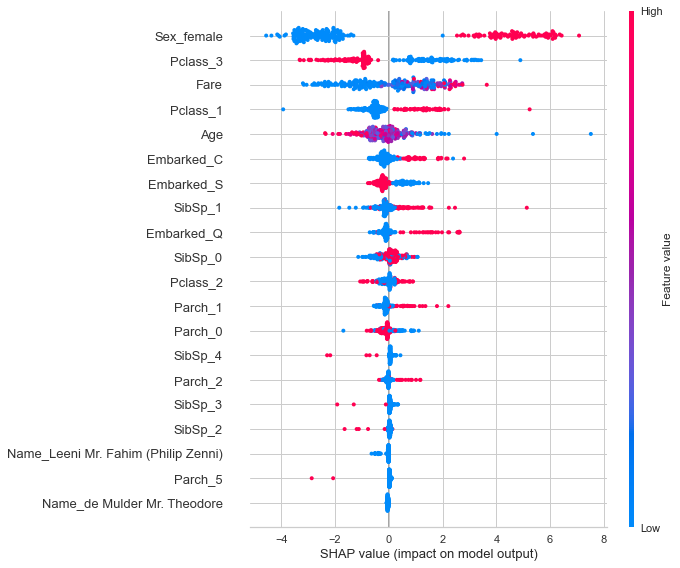

In [75]:
# Interpret the model
pc.interpret_model(tuned_gbc)

In [77]:
# Finalizing the model
final_gbc_model = pc.finalize_model(tuned_gbc)

In [79]:
final_gbc_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.8200000000000001, loss='deviance',
                           max_depth=40, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=145, n_iter_no_change=None,
                           presort='deprecated', random_state=4246,
                           subsample=0.8500000000000002, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Thanks to JCharisTech for his tutorial on Youtube**